In [1]:
# Data import

import numpy as np

data = np.genfromtxt('wine_quality.csv',delimiter=',',dtype=None, encoding='UTF-8',names=True)

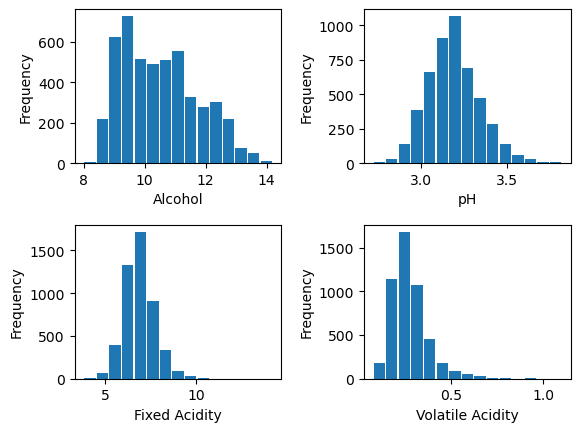

In [2]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.hist(data['alcohol'], bins=15, rwidth=0.9)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(data['pH'], bins=15, rwidth=0.9)
plt.xlabel('pH')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(data['fixed_acidity'], bins=15, rwidth=0.9)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(data['volatile_acidity'], bins=15, rwidth=0.9)
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.show()

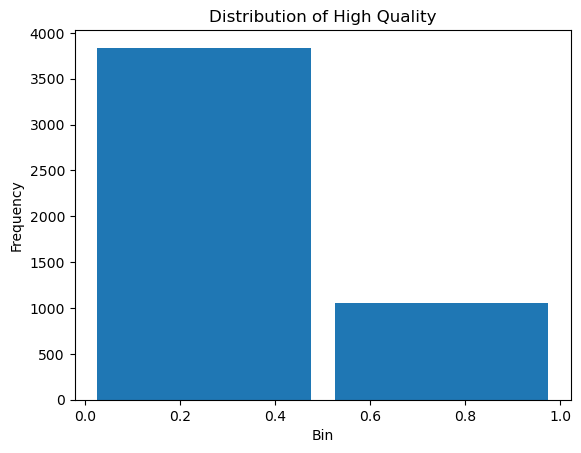

In [3]:
plt.hist(data['High_quality'], bins=2, rwidth=0.9)
plt.title('Distribution of High Quality')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Data reshaping

x1= np.reshape(data['fixed_acidity'], (-1,1))
x2= np.reshape(data['volatile_acidity'], (-1,1))
x3= np.reshape(data['citric_acid'], (-1,1))
x4= np.reshape(data['residual_sugar'], (-1,1))
x5= np.reshape(data['chlorides'], (-1,1))
x6= np.reshape(data['free_sulfur_dioxide'], (-1,1))
x7= np.reshape(data['total_sulfur_dioxide'], (-1,1))
x8= np.reshape(data['density'], (-1,1))
x9= np.reshape(data['pH'], (-1,1))
x10= np.reshape(data['sulphates'], (-1,1))
x11= np.reshape(data['alcohol'], (-1,1))

X= np.concatenate((x1, x2, x3,x4,x5,x6,x7,x8,x9,x10,x11), axis= 1)
y= data['High_quality']

In [5]:
# Normalizing predictor variables

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(X)
X_trans= scaler.transform(X)

In [6]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=0, test_size= 0.3)

In [7]:
# Balancing training data

from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_train_bal, y_train_bal= ros.fit_resample(X_train, y_train)

In [8]:
# Training knn model

import sklearn.neighbors as nn

knn_model0= nn.KNeighborsClassifier(n_neighbors=3)
knn_model0.fit(X_train_bal, y_train_bal)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Testing kNN model

y_pred = knn_model0.predict(X_test)

C:\Users\nort0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
# Model performance metrics

import sklearn.metrics as met

print('Accuracy:', met.accuracy_score(y_test, y_pred))
print('Precision:', met.precision_score(y_test, y_pred))
print('Recall:', met.recall_score(y_test, y_pred))
print('F1:', met.f1_score(y_test, y_pred))
print('ROC AUC:', met.roc_auc_score(y_test, y_pred))

Accuracy: 0.7850340136054422
Precision: 0.4968421052631579
Recall: 0.7539936102236422
F1: 0.5989847715736041
ROC AUC: 0.7737124490184762


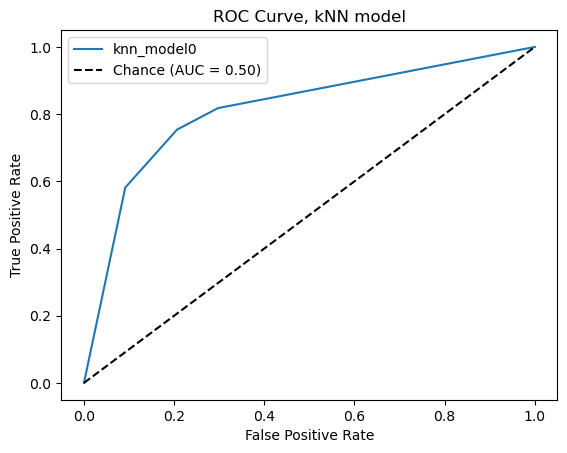

In [11]:
# ROC Curve

y_pred_proba= knn_model0.predict_proba(X_test)
fpr, tpr, cut_offs = met.roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr, label='knn_model0')
plt.plot([0,1], [0,1], '--k', label='Chance (AUC = 0.50)')
plt.title('ROC Curve, kNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()